In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LassoLarsCV
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [56]:
train = pd.read_csv('train.csv') #Creates Dataframe form the csv filea
test = pd.read_csv('test.csv')
print("Train data shape: ", train.shape)#Prints size of the data of train and test
print("Test data shape: ", test.shape)


Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [57]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
plt.style.use(style='ggplot')#plotting
plt.rcParams['figure.figsize'] = (10,6)


In [59]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


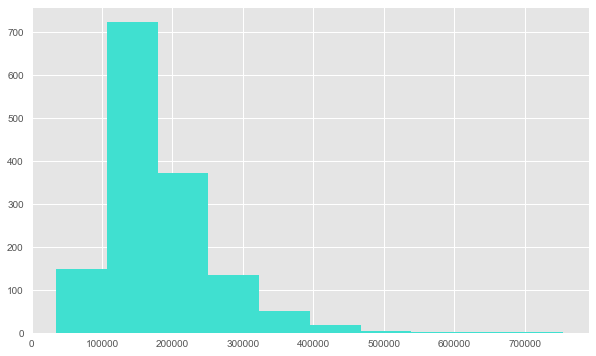

Skew is: 0.12133506220520406


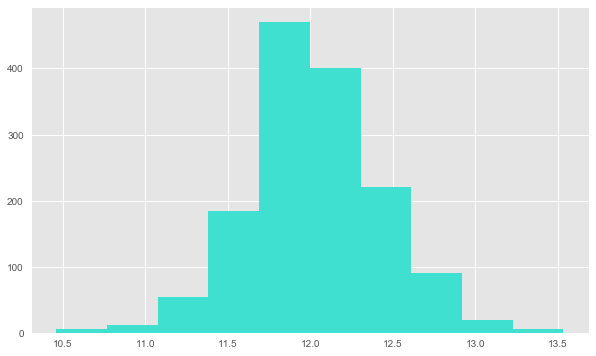

In [60]:
print("Skew is:", train.SalePrice.skew()) # Original Skewness
SP = plt.hist(train.SalePrice, color="turquoise")
plt.show()

target = np.log(train.SalePrice)
print("Skew is:", target.skew()) # log is used to improve skewness
# Now there's a normal distribution (as skewness is close to zero)
logSP = plt.hist(target, color="turquoise")
plt.show()

In [61]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


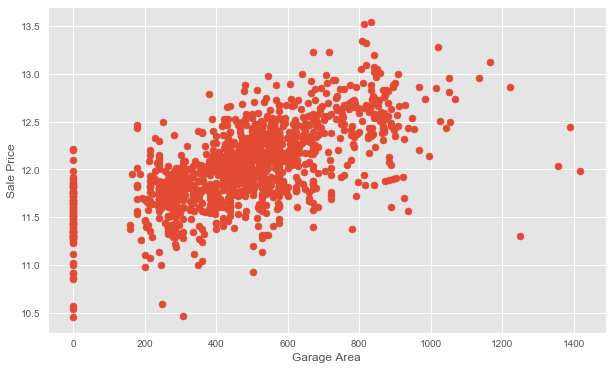

In [62]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()#Shows relation between sale price & garage area

In [63]:
train = train[train['GarageArea'] < 1200]#Eilimates some outliers

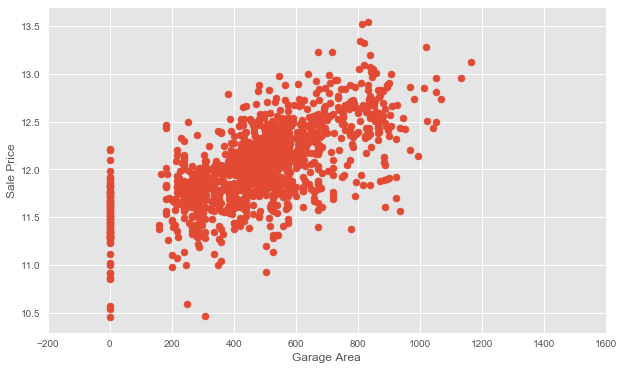

In [64]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)#used to display the same scale as graph with outliers
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

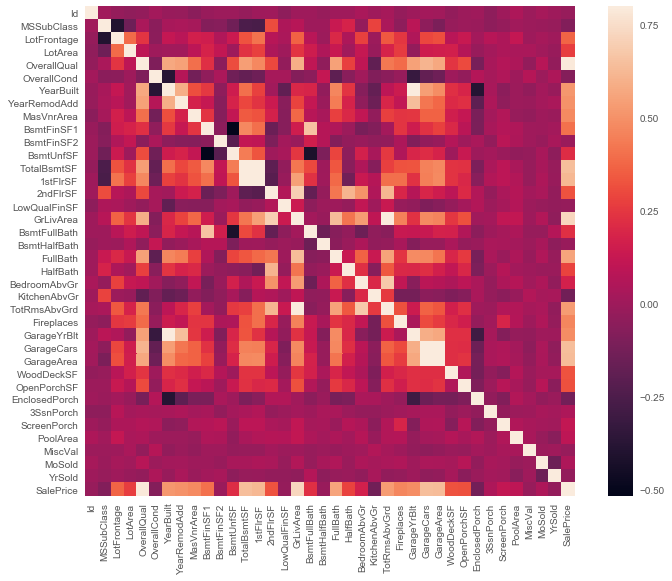

In [65]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

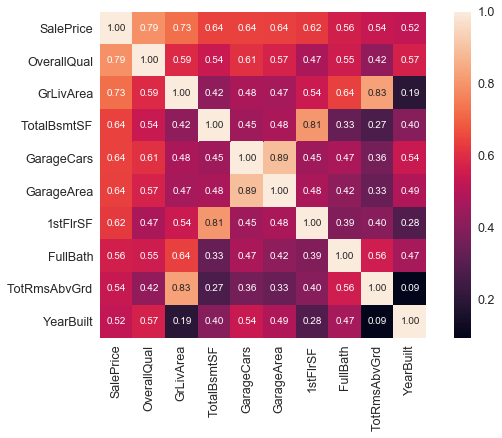

In [66]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [67]:
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

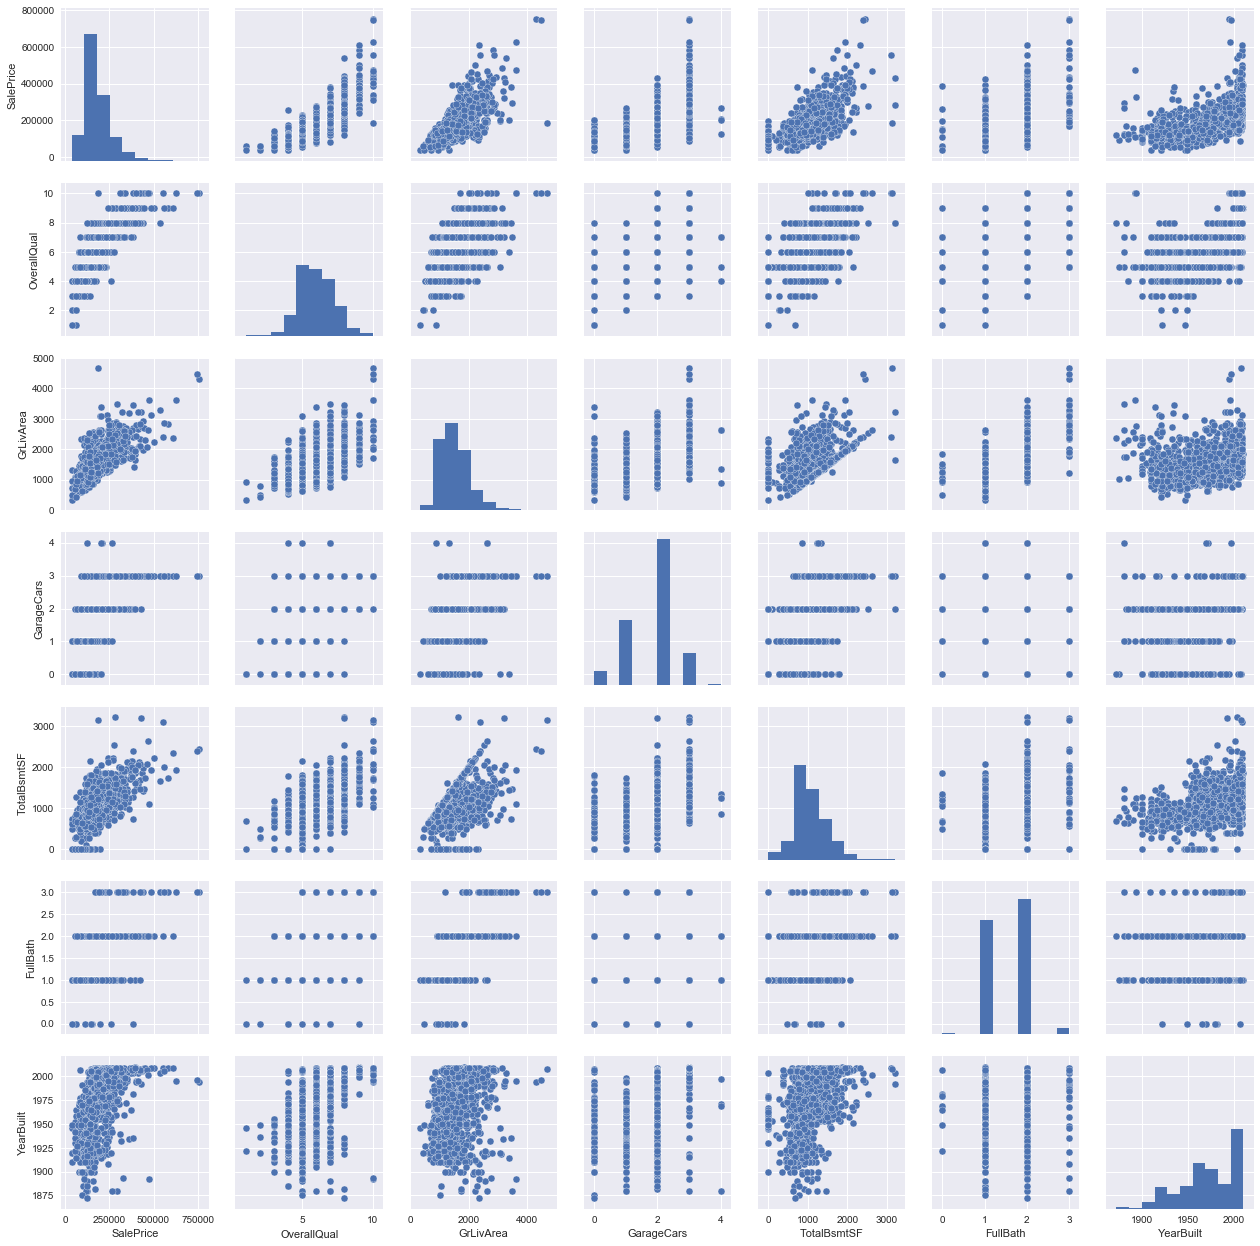

In [68]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [69]:
null = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
nulls = pd.concat([null, percent], axis=1, keys=['Nulls', 'Percent'])
nulls.head(15)

,Nulls,Percent
PoolQC,1449,0.995876
MiscFeature,1402,0.963574
Alley,1364,0.937457
Fence,1174,0.806873
FireplaceQu,689,0.473540
LotFrontage,258,0.177320
GarageCond,81,0.055670
GarageType,81,0.055670
GarageYrBlt,81,0.055670
GarageFinish,81,0.055670


In [70]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()#Count column - non-null obsverations / unique - count of unique values / top most common occurring value / freq freq of top value

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


In [71]:
print("original: \n")
print(train.Street.value_counts(), "\n")#original view of the street data


original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [72]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [73]:
print("Encoded: \n")
print(train.enc_street.value_counts())#encoded views of the street data. Helps the model to understand whether or not a observation falls into one category or another

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


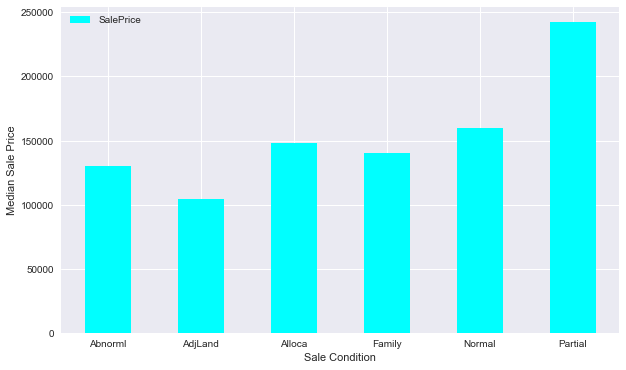

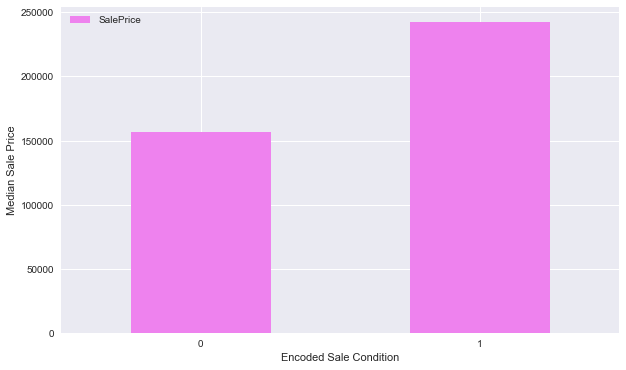

In [74]:
condition_pivot = train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="aqua")
plt.xlabel("Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

def encode(x): return 1 if x == "Partial" else 0
train["EncCondition"] = train.SaleCondition.apply(encode)
test["EncCondition"] = test.SaleCondition.apply(encode)
condition_pivot = train.pivot_table(index="EncCondition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="violet")
plt.xlabel("Encoded Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

In [75]:
data = train.drop(["TotRmsAbvGrd", "PoolArea", "LowQualFinSF", "PoolQC", "MiscFeature", "Alley", "Fence"], axis=1) 
testData = test.drop(["TotRmsAbvGrd", "PoolArea", "LowQualFinSF", "PoolQC", "MiscFeature", "Alley", "Fence"], axis=1)

data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [76]:
print(sum(data.isnull().sum() != 0))#checks if columns have null values / probs can be deleted

0


In [77]:
#Linear Model
y = np.log(train.SalePrice)#target variable
x = data.drop(['SalePrice', 'Id'], axis=1)#tells which columns to exclude

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [79]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
print("R^2 is: \n", model.score(x_test, y_test))

R^2 is: 
 0.8882477709262591


In [80]:
predictions = model.predict(x_test)
print("RMSE is: \n", mean_squared_error(y_test, predictions))

RMSE is: 
 0.01784179451956697


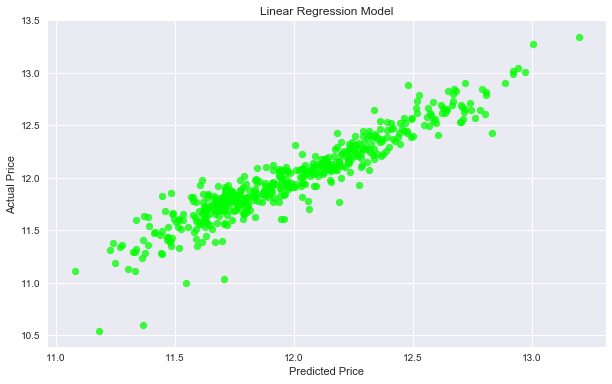

In [81]:
#Scatter plot
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75, color='lime')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

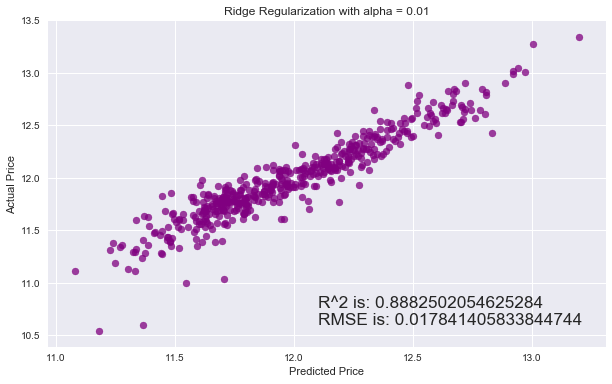

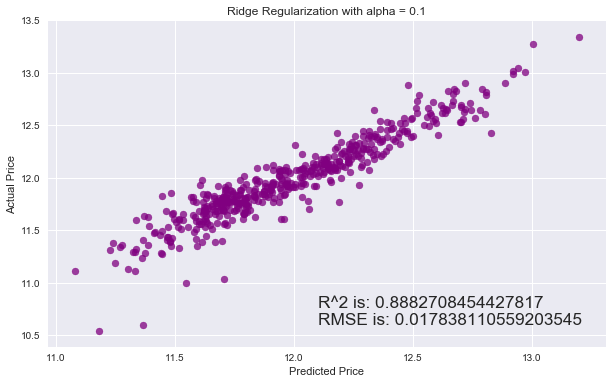

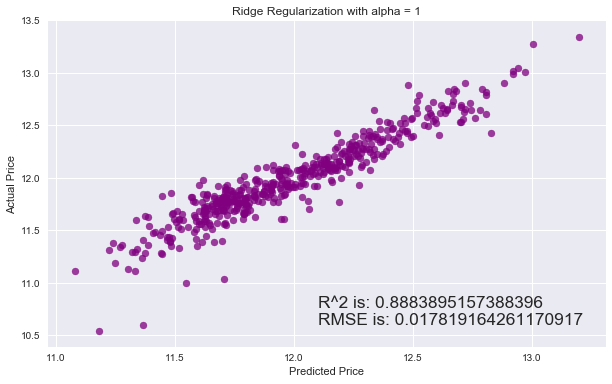

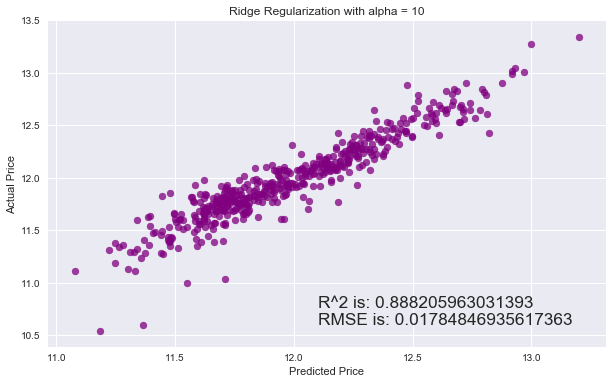

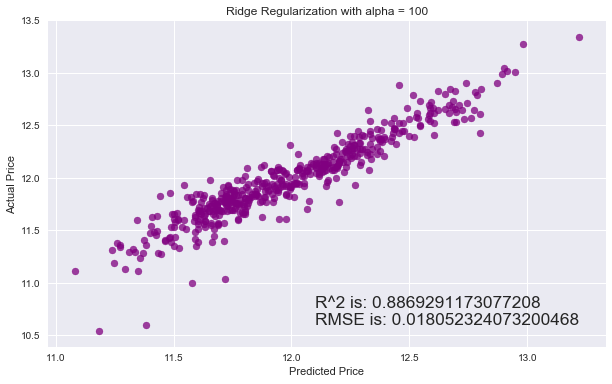

In [90]:
for i in range(-2,3):#loops through different alphas
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75,color='purple')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(x_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    

In [83]:
model=LassoLarsCV(cv=10, precompute=False).fit(x_train,y_train)

In [84]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, model.predict(x_train))
test_error = mean_squared_error(y_test, model.predict(x_test))
print ("Train data MSE is:")
print(train_error)
print ("Test data MSE is:")
print(test_error)

Train data MSE is:
0.01723277896419539
Test data MSE is:
0.017406785046917155


In [85]:
rsquared_train=model.score(x_train,y_train)
rsquared_test=model.score(x_test,y_test)
print ("Train data R^2 is:")
print(rsquared_train)
print ("Test data R^2 is:")
print(rsquared_test)

Train data R^2 is:
0.8909497888718546
Test data R^2 is:
0.8909724563934914


In [86]:
submission = pd.DataFrame()
submission['Id'] = test.Id

features = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(features)
final_predictions = np.exp(predictions)

In [87]:
print("Original Predictions were: \n", predictions[:10], "\n")
print("Final Predictions are: \n", final_predictions[:10])

Original Predictions were: 
 [11.74572804 11.8608334  12.06638242 12.18971164 12.11500171 12.055334
 12.14550062 12.01797924 12.16633442 11.66134196] 

Final Predictions are: 
 [126213.22758767 141610.18663543 173925.51654242 196754.42159294
 182590.58944127 172014.49134094 188245.19520925 165707.46275719
 192208.19618275 115999.59280928]


In [88]:
submission["SalePrice"] = final_predictions
submission.head()

,Id,SalePrice
0,1461,126213.227588
1,1462,141610.186635
2,1463,173925.516542
3,1464,196754.421593
4,1465,182590.589441


In [89]:
submission.to_csv('submission.csv', index=False)